# Probabilistic Principle Component Analysis

Probabilistic PCA (PPCA)

*References*
* Bishop, C. M. (1999). Variational principal components. 9th International Conference on Artificial Neural Networks: ICANN ’99, 1999, 509–514. doi:10.1049/cp:19991160
* Tipping, M. E., & Bishop, C. M. (1999). Probabilistic Principal Component Analysis, 611–622.
* https://github.com/cangermueller/ppca

## Initialization

In [31]:
%load_ext autoreload
%autoreload 2
# tes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import sklearn.datasets as ds
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
import pandas as pd

In [33]:
os.sys.path.append('../src/')
import pca

## Functions

In [52]:
import time

def convert_to_timestamp(x):
    """Convert date objects to integers
    
    convert_to_timestamp('2019-07-29T00:00:00')
    >>> 1564333200.0
    
    """
    x = pd.to_datetime(x)
    
    return time.mktime(x.timetuple())


def normalize(data):
    """Normalize the DF using min/max"""
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

def normalizeDate(data):
    data = data.apply(convert_to_timestamp)
    return normalize(data)

def npToDf(data, col=None):
    if col is None:
        col = [str(i) for i in range(data.shape[0])]
    
    return pd.DataFrame(
        data, 
        columns = col
    )

## Plotting functions

In [35]:
def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)

def plot_digits(x, classes, ax=None):
    xx = x[0, :]
    yy = x[1, :]
    width = np.max(xx) - np.min(xx)
    height = np.max(yy) - np.min(yy)
    ax = plt.gca() if ax is None else ax
    ax.set_xlim([np.min(xx) - 0.1 * width, np.max(xx) + 0.1 * width])
    ax.set_ylim([np.min(yy) - 0.1 * height, np.max(yy) + 0.1 * height])
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=0, vmax=9)
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(range(10))
    for x1, x2, digit in zip(xx, yy, classes):
        ax.text(x1, x2, digit, color=colors[int(digit)])
         
def plot_mse(mse):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(mse, linewidth=2, marker='s',markersize=5, markerfacecolor='red')
    ax.grid()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    
def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]

def plot_bppca(y, y_classes, maxit=7, *args, **kwargs):
    np.random.seed(0)
    bppca = pca.bppca.BPPCA(y, *args, **kwargs)
        
    fig, ax = plot_grid(maxit + 1)
    mse = [bppca.mse()]
    plot_scatter(bppca.transform(), y_classes, ax[0])
    for i in range(maxit):
        bppca.update()
        mse.append(bppca.mse())
        j = i + 1
        plot_scatter(bppca.transform(), y_classes, ax[j])
        ax[j].set_title('Iteration {}'.format(j))
    plot_mse(mse)
    return bppca

## 1 Dataset

In [36]:
try:
    open("file", "r").read()
except:
    print("no file")

no file


In [37]:
baseurl = "https://github.com/wildangunawan/Dataset-Saham-IDX/raw/master/Saham/Semua/{}.csv"

emiten = "ACES"
fname = f'{emiten}.csv'
try:
    open(fname, "r").read()
    df = pd.read_csv(fname)
except:
    print("no file")
    df = pd.read_csv(baseurl.format(emiten))
    df.to_csv(fname)
df

,Unnamed: 0,date,previous,open_price,first_trade,high,low,close,change,volume,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,0,2019-07-29T00:00:00,1800.0,0.0,0.0,1825.0,1770.0,1800.0,0.0,3685600.0,...,268500.0,1.715000e+10,1.715000e+10,1.715000e+10,1020200.0,2954200.0,NaN,0.0,0.000000e+00,0.0
1,1,2019-07-30T00:00:00,1800.0,0.0,0.0,1830.0,1785.0,1805.0,5.0,4619600.0,...,25100.0,1.715000e+10,1.715000e+10,1.715000e+10,3823200.0,3442900.0,NaN,1885329.0,3.393592e+09,3.0
2,2,2019-07-31T00:00:00,1805.0,0.0,0.0,1840.0,1795.0,1835.0,30.0,6431600.0,...,30000.0,1.715000e+10,1.715000e+10,1.715000e+10,3322400.0,3889100.0,NaN,70.0,1.267000e+05,1.0
3,3,2019-08-01T00:00:00,1835.0,0.0,0.0,1835.0,1755.0,1755.0,-80.0,12070500.0,...,668000.0,1.715000e+10,1.715000e+10,1.715000e+10,8486200.0,4504000.0,NaN,8296737.0,1.498515e+10,4.0
4,4,2019-08-02T00:00:00,1755.0,0.0,0.0,1785.0,1715.0,1715.0,-40.0,13368500.0,...,290700.0,1.715000e+10,1.715000e+10,1.715000e+10,10324600.0,5412400.0,NaN,1239894.0,2.139564e+09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,474,2021-07-05T00:00:00,1325.0,1340.0,1335.0,1420.0,1335.0,1420.0,95.0,20959300.0,...,92600.0,1.715000e+10,1.715000e+10,1.715000e+10,3632600.0,14741800.0,NaN,3200000.0,4.425600e+09,1.0
475,475,2021-07-06T00:00:00,1420.0,1425.0,1425.0,1490.0,1425.0,1485.0,65.0,27145900.0,...,1085600.0,1.715000e+10,1.715000e+10,1.715000e+10,6239400.0,21318700.0,NaN,2590800.0,3.825430e+09,14.0
476,476,2021-07-07T00:00:00,1485.0,1500.0,1505.0,1600.0,1500.0,1565.0,80.0,42670900.0,...,295500.0,1.715000e+10,1.715000e+10,1.715000e+10,9996800.0,25230200.0,NaN,3204639.0,4.960628e+09,3.0
477,477,2021-07-08T00:00:00,1565.0,1570.0,1570.0,1585.0,1540.0,1570.0,5.0,28250200.0,...,2000.0,1.715000e+10,1.715000e+10,1.715000e+10,14191300.0,25253800.0,NaN,5031286.0,7.829755e+09,9.0


In [60]:
fcolumns = ['previous','open_price','first_trade','low','close','change','volume']
len(fcolumnsumns)

7

In [38]:
feature, label = df.loc[:,fcolumns], df.loc[:,["high"]]
# previous	open_price	first_trade	low	close	change	volume
# feature, label
# feature = all col except high
mainx = feature.values.T
mainy = label.values

In [56]:
npToDf(mainx, [str(i) for i in range(mainx.shape[1])])

,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,478
0,1800.0,1800.0,1805.0,1835.0,1755.0,1715.0,1685.0,1700.0,1715.0,1720.0,...,1335.0,1300.0,1270.0,1250.0,1250.0,1325.0,1420.0,1485.0,1565.0,1570.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1335.0,1300.0,1270.0,1250.0,1270.0,1340.0,1425.0,1500.0,1570.0,1570.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1335.0,1300.0,1275.0,1255.0,1265.0,1335.0,1425.0,1505.0,1570.0,1570.0
3,1770.0,1785.0,1795.0,1755.0,1715.0,1655.0,1650.0,1705.0,1675.0,1710.0,...,1280.0,1255.0,1235.0,1235.0,1260.0,1335.0,1425.0,1500.0,1540.0,1505.0
4,1800.0,1805.0,1835.0,1755.0,1715.0,1685.0,1700.0,1715.0,1720.0,1725.0,...,1300.0,1270.0,1250.0,1250.0,1325.0,1420.0,1485.0,1565.0,1570.0,1545.0
5,0.0,5.0,30.0,-80.0,-40.0,-30.0,15.0,15.0,5.0,5.0,...,-35.0,-30.0,-20.0,0.0,75.0,95.0,65.0,80.0,5.0,-25.0
6,3685600.0,4619600.0,6431600.0,12070500.0,13368500.0,5211200.0,6663100.0,8206100.0,10489100.0,5346500.0,...,12189000.0,16776000.0,22473700.0,6239200.0,24455000.0,20959300.0,27145900.0,42670900.0,28250200.0,10635900.0


In [58]:
npToDf(mainy, [str(i) for i in range(mainy.shape[1])])

,0
0,1825.0
1,1830.0
2,1840.0
3,1835.0
4,1785.0
...,...
474,1420.0
475,1490.0
476,1600.0
477,1585.0


### 1.1 PPCA

In [39]:
ppca = pca.ppca.PPCA()
ppca.fit(mainx)

In [61]:
ppca.__dict__

{'q': 2,
 'prior_sigma': 1.0,
 'y': array([[ 1.80000e+03,  1.80000e+03,  1.80500e+03, ...,  1.48500e+03,
          1.56500e+03,  1.57000e+03],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  1.50000e+03,
          1.57000e+03,  1.57000e+03],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  1.50500e+03,
          1.57000e+03,  1.57000e+03],
        ...,
        [ 1.80000e+03,  1.80500e+03,  1.83500e+03, ...,  1.56500e+03,
          1.57000e+03,  1.54500e+03],
        [ 0.00000e+00,  5.00000e+00,  3.00000e+01, ...,  8.00000e+01,
          5.00000e+00, -2.50000e+01],
        [ 3.68560e+06,  4.61960e+06,  6.43160e+06, ...,  4.26709e+07,
          2.82502e+07,  1.06359e+07]]),
 'p': 7,
 'n': 479,
 'w': array([[-3.01125307e+01,  1.31033752e+01],
        [-4.63526543e+02, -1.72634616e+04],
        [-4.63128064e+02, -1.72701561e+04],
        [ 9.17669901e+00, -6.21231341e+00],
        [-2.26193021e+01,  4.30985091e+01],
        [ 7.49322841e+00,  2.99951339e+01],
        [-7.3

In [40]:
ppcaTransformed = ppca.transform()
ppcaTransformed

array([[ 2.36009685e-02,  2.23256728e-02,  1.98515443e-02,
         1.21521168e-02,  1.03798106e-02,  2.15178944e-02,
         1.95354512e-02,  1.74286189e-02,  1.43113809e-02,
         2.13331540e-02,  2.19209643e-02,  2.09281725e-02,
         1.38468674e-02,  1.19339237e-02,  1.79235811e-02,
        -4.95294599e-04,  4.88183849e-03,  1.27105707e-02,
        -3.01598361e-03,  1.54636530e-02,  1.37495135e-02,
         1.45806404e-02,  1.84129452e-02,  9.66337841e-03,
         1.60744148e-03,  1.49050625e-02,  8.21918104e-03,
         1.16069073e-02,  1.87167496e-02,  1.66809187e-02,
         1.90688896e-02,  1.15873819e-02,  1.39398520e-02,
         1.31342584e-02,  1.13605868e-02,  9.44545849e-03,
         1.54043941e-02,  1.68305680e-02,  1.89105017e-02,
        -1.26088169e-03,  2.08125220e-02,  1.73780986e-02,
         1.83661115e-02, -6.15738939e-03,  7.72845159e-03,
         4.99694281e-03, -6.53793000e-03,  2.04057655e-02,
         1.40871801e-02,  1.23438207e-02,  2.11515541e-0

In [51]:
dfppca = npToDf(
    ppcaTransformed.T, 
    [str(i) for i in range(ppcaTransformed.shape[0])]
)
dfppca

,0,1
0,0.023601,0.043339
1,0.022326,0.043373
2,0.019852,0.043442
3,0.012152,0.043636
4,0.010380,0.043681
...,...,...
474,0.000015,-0.032681
475,-0.008432,-0.037465
476,-0.029630,-0.041335
477,-0.009940,-0.045726


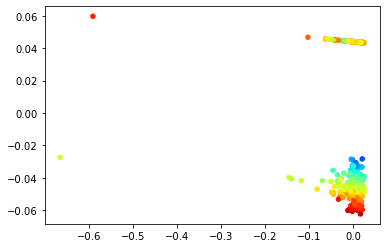

In [59]:
plot_scatter(ppcaTransformed, mainy)

### 1.2 BPPCA

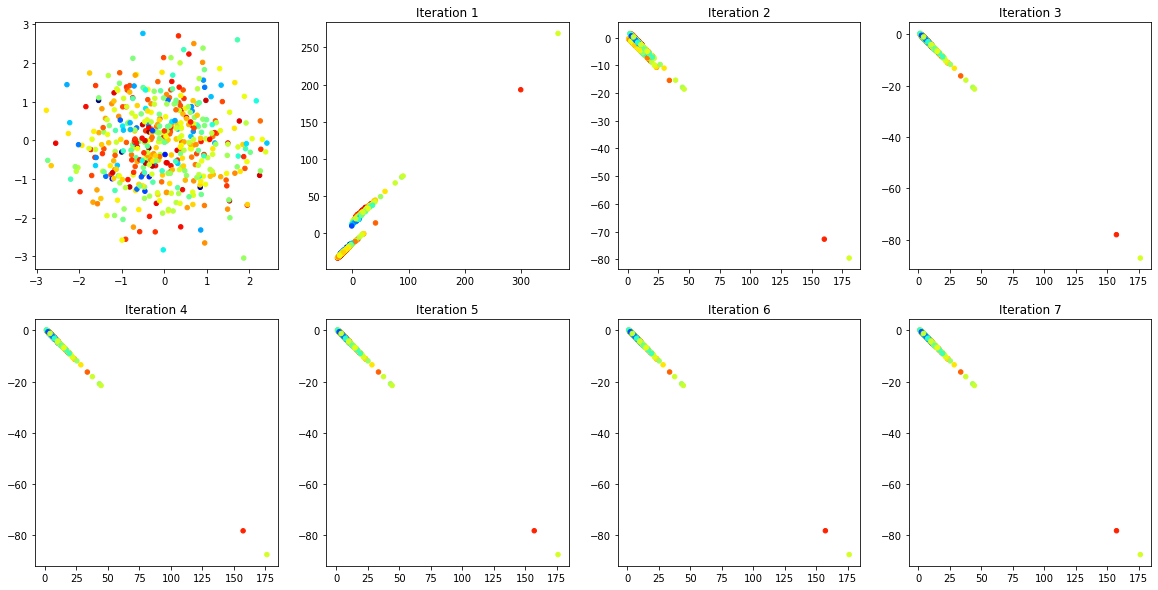

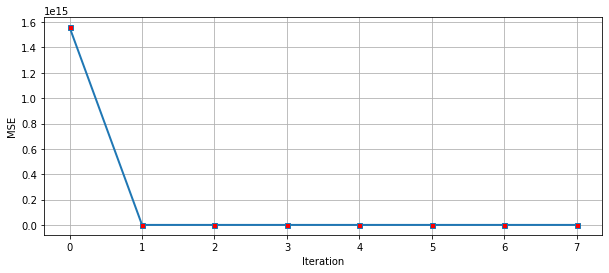

In [42]:
bppca = plot_bppca(mainx, mainy)